# Recreating @dgleeson's implementation which can be found [here](https://public.tableau.com/profile/donovangleeson#!/vizhome/MakeoverMonday-Week30/OffensiveContribution).

In [1]:
import math
import numpy as np 
import pandas as pd
from PIL import Image

import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{xcolor}')
rc('pgf', preamble=r'\usepackage{xcolor}', rcfonts=False)

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None # surpress is copy warning

In [2]:
df = pd.read_csv('../Arsenal Player Stats 2018-19.csv')
df.head()

,Rank,Player,Nationality,Metric,Stat
0,1,Pierre-Emerick Aubameyang,Gabon,Appearances,36
1,2,Alex Iwobi,Nigeria,Appearances,35
2,2,Alexandre Lacazette,France,Appearances,35
3,4,Lucas Torreira,Uruguay,Appearances,34
4,5,Matteo Guendouzi,France,Appearances,33


In [3]:
print(df['Player'].unique())
df = df.query(
    'Player == "Pierre-Emerick Aubameyang" '
  + ' or Player == "Alexandre Lacazette"'
  + ' or Player == "Aaron Ramsey"'
)

['Pierre-Emerick Aubameyang' 'Alex Iwobi' 'Alexandre Lacazette'
 'Lucas Torreira' 'Matteo Guendouzi' 'Bernd Leno' 'Shkodran Mustafi'
 'Granit Xhaka' 'Aaron Ramsey' 'Henrikh Mkhitaryan' 'Sokratis'
 'Mesut Özil' 'Sead Kolasinac' 'Nacho Monreal' 'Héctor Bellerín'
 'Laurent Koscielny' 'Ainsley Maitland-Niles' 'Stephan Lichtsteiner'
 'Rob Holding' 'Danny Welbeck' 'Mohamed Elneny' 'Petr Cech'
 'Eddie Nketiah' 'Denis Suárez' 'Konstantinos Mavropanos' 'Carl Jenkinson'
 'Joe Willock' 'Bukayo Saka']


In [4]:
pt = pd.pivot_table(df, values='Stat', index=['Player'], columns=['Metric'])
pt.reset_index(inplace=True)
print(pt.columns)
pt.head()

Index(['Player', 'Appearances', 'Assists', 'Big Chances Missed', 'Clearances',
       'Clearances Off Line', 'Dispossessed', 'Fouls', 'Goals', 'High Claim',
       'Hit Woodwork', 'Minutes Played', 'Offsides', 'Own Goal', 'Passes',
       'Punches', 'Red Cards', 'Saves', 'Shots', 'Tackles', 'Touches',
       'Yellow Cards'],
      dtype='object', name='Metric')


Metric,Player,Appearances,Assists,Big Chances Missed,Clearances,Clearances Off Line,Dispossessed,Fouls,Goals,High Claim,...,Offsides,Own Goal,Passes,Punches,Red Cards,Saves,Shots,Tackles,Touches,Yellow Cards
0,Aaron Ramsey,28,6,2,3,0,27,21,4,0,...,4,0,773,0,0,0,33,34,1029,0
1,Alexandre Lacazette,35,8,13,29,0,61,51,13,0,...,24,0,771,0,0,0,81,35,1313,2
2,Pierre-Emerick Aubameyang,36,5,23,18,0,33,13,22,0,...,23,0,692,0,0,0,94,21,1132,0


In [5]:
team_goals = pt['Goals'].sum()
pt['SCORING PARTICIPATION RATE'] = (pt['Assists'] + pt['Own Goal']) / team_goals


pt['NET POINTS PER GAME'] = (pt['Goals'] + pt['Assists'] - pt['Own Goal']) / (pt['Minutes Played'] / 90)
pt = pt.sort_values(by='NET POINTS PER GAME', ascending=False)

pt['GOALS SHOT EFFICIENCY'] = (pt['Goals'] / pt['Shots'])
pt['HIT WOODWORK SHOT EFFICIENCY'] = (pt['Hit Woodwork'] / pt['Shots']) + pt['GOALS SHOT EFFICIENCY']

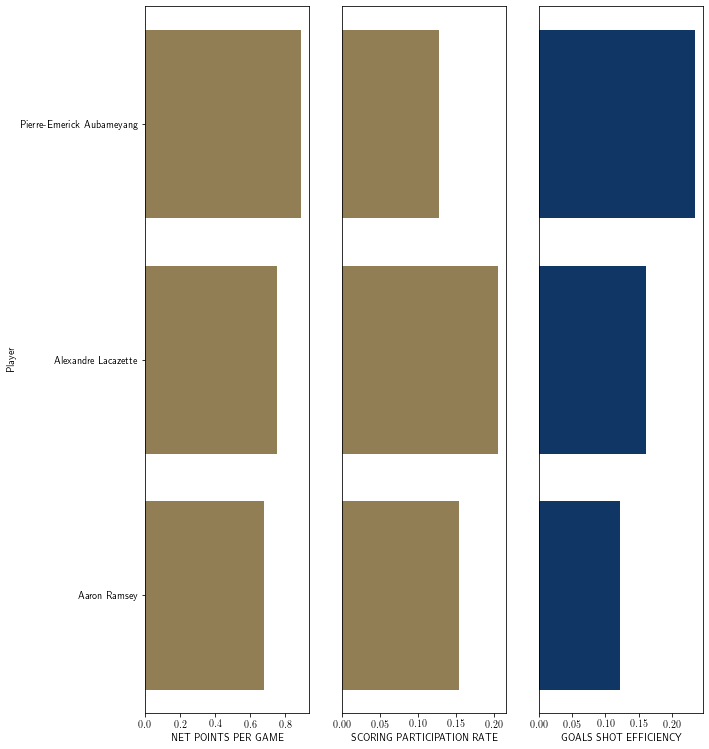

In [10]:
gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(10, 13))


ax = plt.subplot(gs[0, 0])
sns.barplot(ax=ax, x='NET POINTS PER GAME', y='Player', data=pt, color="#9c824a")

ax = plt.subplot(gs[0, 1])
ax.get_yaxis().set_visible(False)
sns.barplot(ax=ax, x='SCORING PARTICIPATION RATE', y='Player', data=pt, color="#9c824a")

ax = plt.subplot(gs[0, 2])
ax.get_yaxis().set_visible(False)
sns.barplot(ax=ax, x='GOALS SHOT EFFICIENCY', y='Player', data=pt, color="#023474");